In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [90]:
titanic_data = pd.read_csv("D:/bharat intern/tested.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [91]:
#remove missing value here cabin has been removed
titanic_data = titanic_data.drop(columns = 'Cabin' , axis =1)
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [92]:
#replacing null values with mean values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [93]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [94]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [95]:
#for Fare we use medain
print(titanic_data['Fare'].median())

14.4542


In [96]:
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace = True)

In [97]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [98]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [99]:
#how many peoples survived
titanic_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

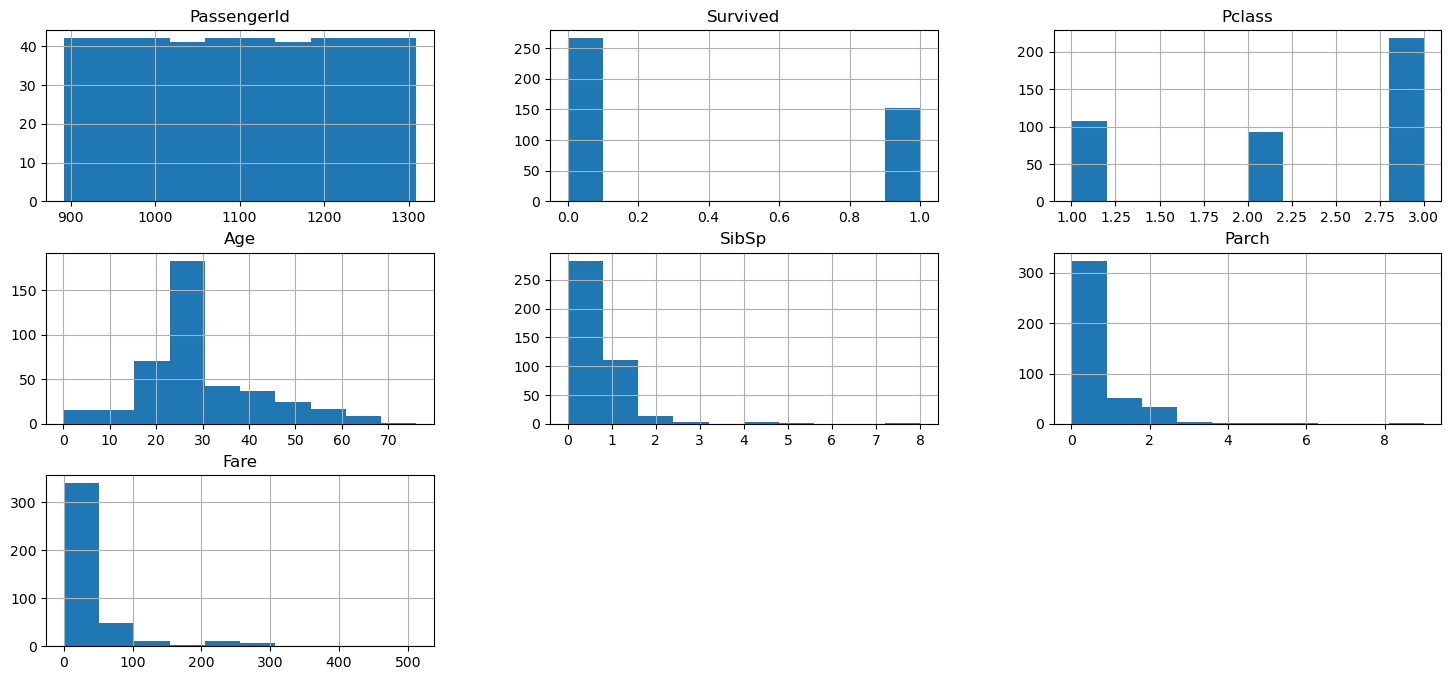

In [100]:
titanic_data.hist(figsize=(18,8))

<Axes: ylabel='count'>

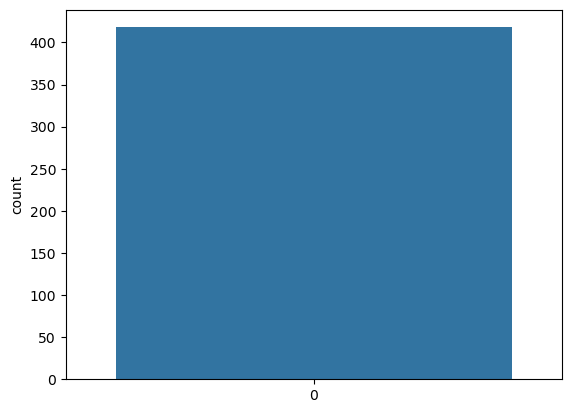

In [101]:
#visualization of survival data
sns.countplot(titanic_data['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

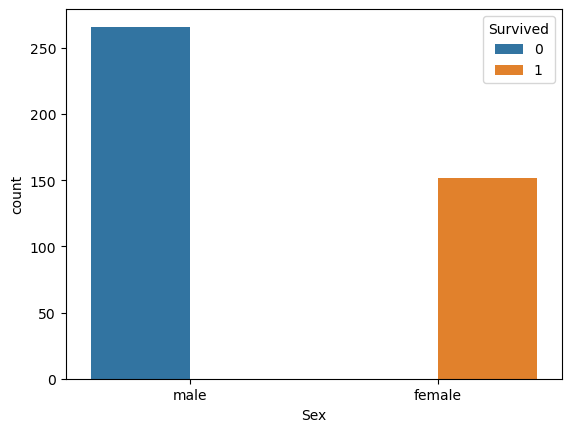

In [102]:
titanic_data['Survived'] = titanic_data['Survived'].astype(str)
sns.countplot(x='Sex',hue = 'Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

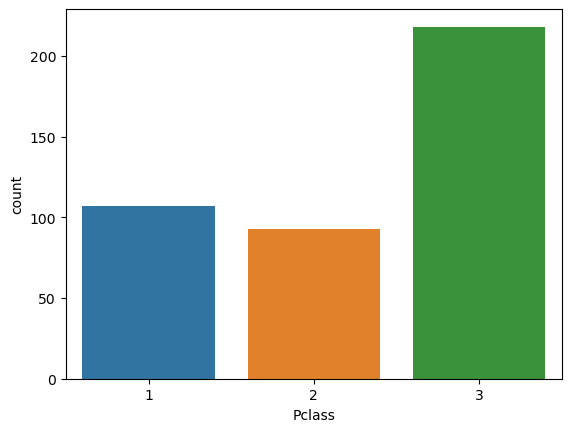

In [103]:
# count plot for pclass
sns.countplot(x = 'Pclass', data= titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

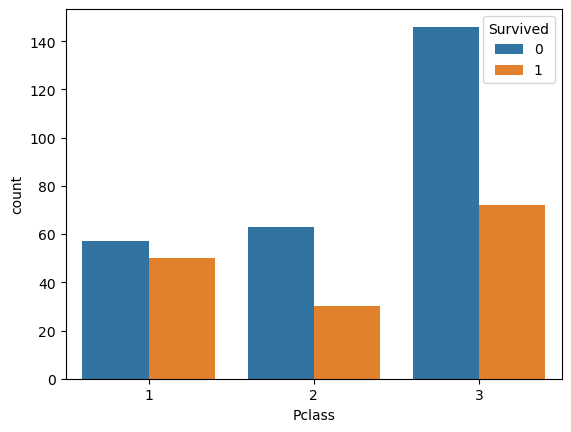

In [104]:
sns.countplot(x='Pclass',hue = 'Survived', data=titanic_data)

In [105]:
# Print the data types of all columns
print(titanic_data.dtypes)

# Select only numeric columns and print their data types to confirm
numeric_data = titanic_data.select_dtypes(include=['number'])
print(numeric_data.dtypes)


PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object


In [106]:
numeric_data = titanic_data.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
print(corr_matrix)

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.026751 -0.030874  0.003818  0.043080  0.008633
Pclass         -0.026751  1.000000 -0.440782  0.001087  0.018721 -0.577313
Age            -0.030874 -0.440782  1.000000 -0.079535 -0.045073  0.324568
SibSp           0.003818  0.001087 -0.079535  1.000000  0.306895  0.171912
Parch           0.043080  0.018721 -0.045073  0.306895  1.000000  0.230325
Fare            0.008633 -0.577313  0.324568  0.171912  0.230325  1.000000


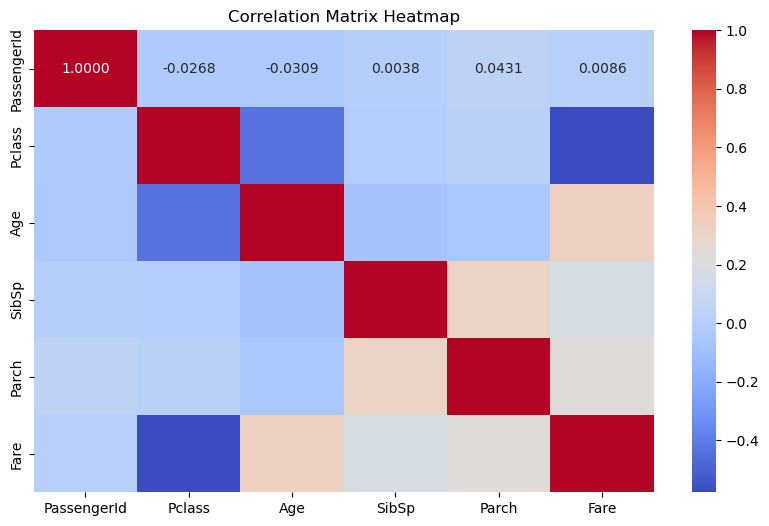

In [107]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

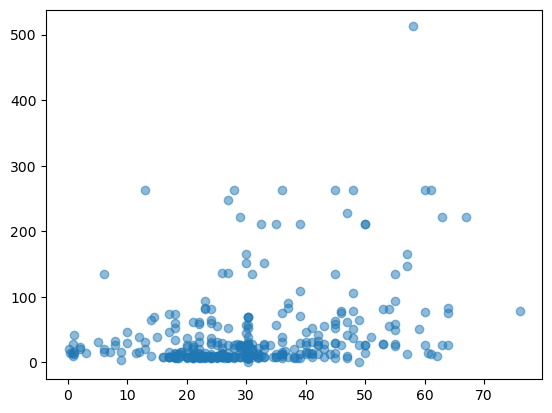

In [108]:
plt.scatter(titanic_data['Age'], titanic_data['Fare'], alpha=0.5)

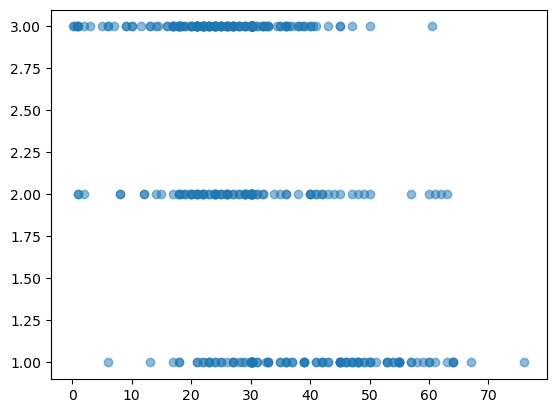

In [109]:
plt.scatter(titanic_data['Age'], titanic_data['Pclass'], alpha=0.5)

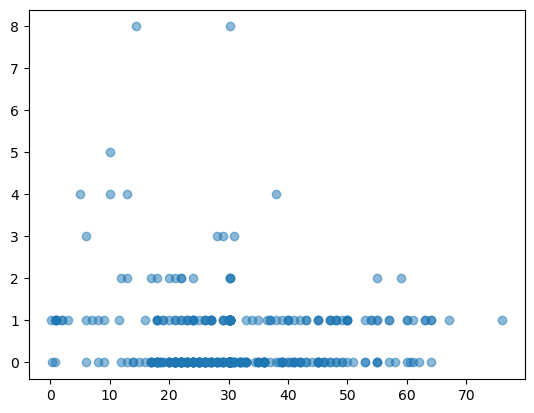

In [110]:
plt.scatter(titanic_data['Age'], titanic_data['SibSp'], alpha=0.5)

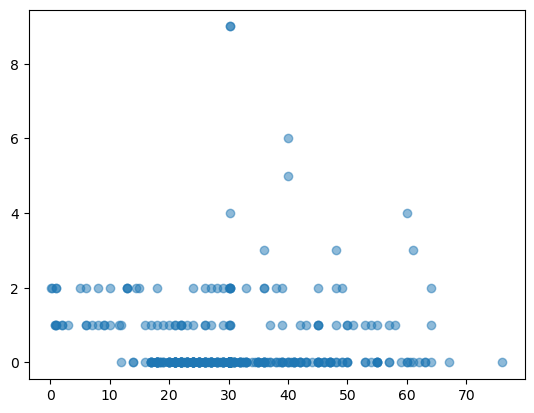

In [111]:
plt.scatter(titanic_data['Age'], titanic_data['Parch'], alpha=0.5)

In [112]:
titanic_data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [113]:
titanic_data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [114]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


In [115]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis = 1)
Y = titanic_data['Survived']

In [116]:
X = titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis = 1)
Y = titanic_data['Survived']

In [117]:
X = pd.get_dummies(X, drop_first=True)

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [119]:
print(X)


     Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         3  34.50000      0      0    7.8292      True        True   
1         3  47.00000      1      0    7.0000     False       False   
2         2  62.00000      0      0    9.6875      True        True   
3         3  27.00000      0      0    8.6625      True       False   
4         3  22.00000      1      1   12.2875     False       False   
..      ...       ...    ...    ...       ...       ...         ...   
413       3  30.27259      0      0    8.0500      True       False   
414       1  39.00000      0      0  108.9000     False       False   
415       3  38.50000      0      0    7.2500      True       False   
416       3  30.27259      0      0    8.0500      True       False   
417       3  30.27259      1      1   22.3583      True       False   

     Embarked_S  
0         False  
1          True  
2         False  
3          True  
4          True  
..          ...  
413        True  
414

In [120]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: object


In [134]:
model = LogisticRegression()
model.fit(X_train, Y_train)

D:\Users\praga\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
score = model.score(X_test, Y_test)
print(f'Model accuracy: {score}')

Model accuracy: 1.0


In [123]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Survived'], drop_first=True)

In [124]:
titanic_data = pd.get_dummies(titanic_data, drop_first=True)


In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [126]:
print(X.shape,X_train.shape,X_test.shape)

(418, 8) (334, 8) (84, 8)


In [148]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
model = LogisticRegression()
model
model.fit(X_train, Y_train)

D:\Users\praga\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
X_train_prediction = model.predict(X_train)
print("Training predictions:", X_train_prediction)

Training predictions: ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '1' '0'
 '0' '1' '0' '0' '1' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1' '0' '0'
 '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0'
 '0' '0' '1' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1'
 '0' '1' '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0'
 '0' '1' '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '1' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '1' '1' '0' '1' '0' '1' '1' '1' '0' '1' '1' '0' '1' '1' '0'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '0' 

In [138]:
train_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Training accuracy:", train_accuracy)

Training accuracy: 1.0


In [139]:
X_test_prediction = model.predict(X_test)
print("Testing predictions:", X_test_prediction)

Testing predictions: ['0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0' '1' '1' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0'
 '1' '0' '1' '0' '1' '1' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '1' '0'
 '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '1' '0' '1' '1' '0' '0' '1' '0' '1']


In [140]:
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Testing accuracy:", test_accuracy)

Testing accuracy: 1.0


In [141]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [149]:
joblib.dump(model, 'titanic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']